# Text Analysis

Analyzing the properties of text elements, such as their font, size, style, and color, can be crucial for understanding document structure and extracting specific information. Natural PDF provides tools to access and analyze these properties.

## Introduction

Beyond just the sequence of characters, the *style* of text carries significant meaning. Headings are often larger and bolder, important terms might be italicized, and different sections might use distinct fonts. This page covers how to access and utilize this stylistic information.

## Accessing Font Information

Every `TextElement` (representing characters or words) holds information about its font properties.

In [1]:
from natural_pdf import PDF

# Load the PDF
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")

# Select the first page
page = pdf.pages[0]

In [2]:
# Find the first word element
word = page.find('word')

print("Text:", word.text)
print("Font Name:", word.fontname) # Font reference (e.g., F1) or name
print("Size:", word.size)
print("Color:", word.color) # Non-stroking color
print("Is Bold:", word.bold)
print("Is Italic:", word.italic)

Text: Jungle Health and Safety Inspection Service
Font Name: Helvetica
Size: 8.0
Color: (0, 0, 0)
Is Bold: False
Is Italic: False


- `fontname`: Often an internal reference (like 'F1', 'F2') or a basic name.
- `size`: Font size in points.
- `color`: The non-stroking color, typically a tuple representing RGB or Grayscale values (e.g., `(0.0, 0.0, 0.0)` for black).
- `bold`, `italic`: Boolean flags indicating if the font style is bold or italic (heuristically determined based on font name conventions).

## Working with Text Styles

You can directly select text based on its style using pseudo-classes in selectors:

In [3]:
# Find all bold text elements
bold_text = page.find_all('text:bold')

# Find all italic text elements
italic_text = page.find_all('text:italic')

# Find text that is both bold and larger than 12pt
bold_headings = page.find_all('text:bold[size>=12]')

print(f"Found {len(bold_text)} bold elements.")
print(f"Found {len(italic_text)} italic elements.")
print(f"Found {len(bold_headings)} bold headings.")

Found 9 bold elements.
Found 0 italic elements.
Found 1 bold headings.


## Analyzing Fonts on a Page

You can use `analyze_text_styles` to assign labels to text based on font sizes, bold/italic and font names.

In [4]:
page.analyze_text_styles()
page.text_style_labels

['10.0pt Bold Helvetica (medium)',
 '10.0pt Helvetica (medium)',
 '12.0pt Bold Helvetica (large)',
 '8.0pt Helvetica (small)']

One they're assigned, you can filter based on `style_label` instead of going bit-by-bit.

In [5]:
page.find_all('text[style_label="10.0pt Bold Helvetica"]')

<ElementCollection[Mixed](count=0)>

## Visualizing Text Properties

Use highlighting to visually inspect text properties. Grouping by attributes like `fontname` or `size` can be very insightful. In the example below we go right to grouping by the `style_label`, which combines font name, size and variant.

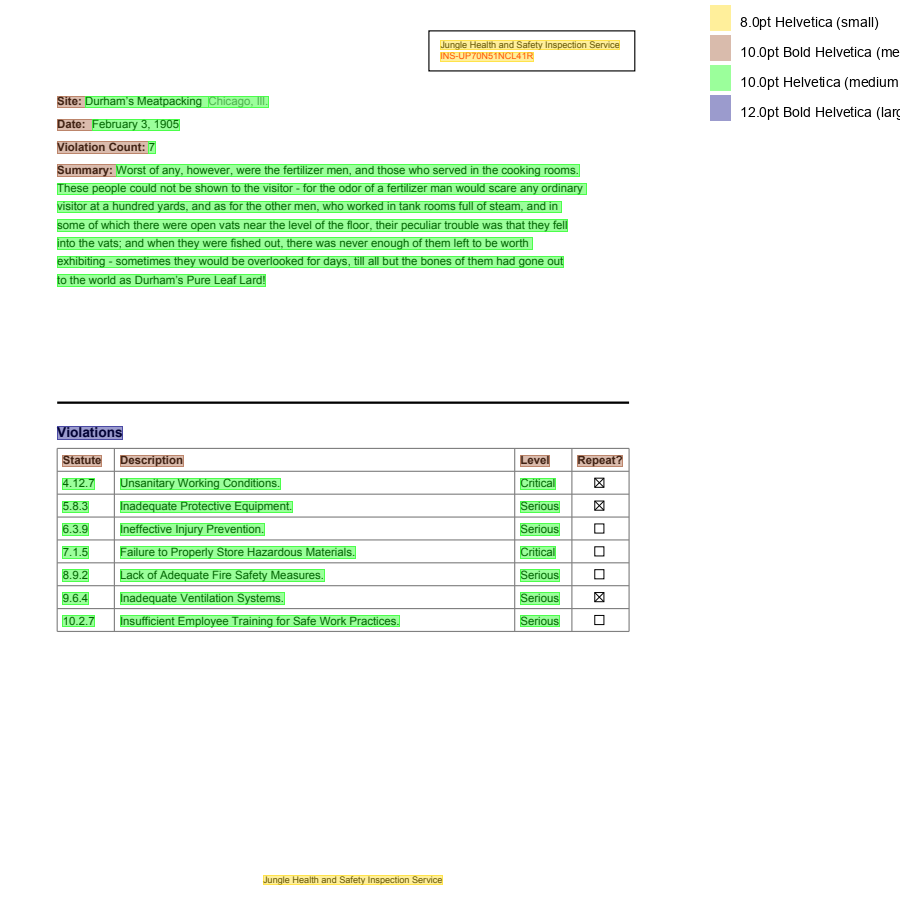

In [6]:
page.find_all('text').show(group_by='style_label', width=700)

This allows you to quickly see patterns in font usage across the page layout.

## Weird font names

Oftentimes font names aren't what you're used to – Arial, Helvetica, etc – the PDF has given them weird, weird names. Relax, it's okay, they're normal fonts.

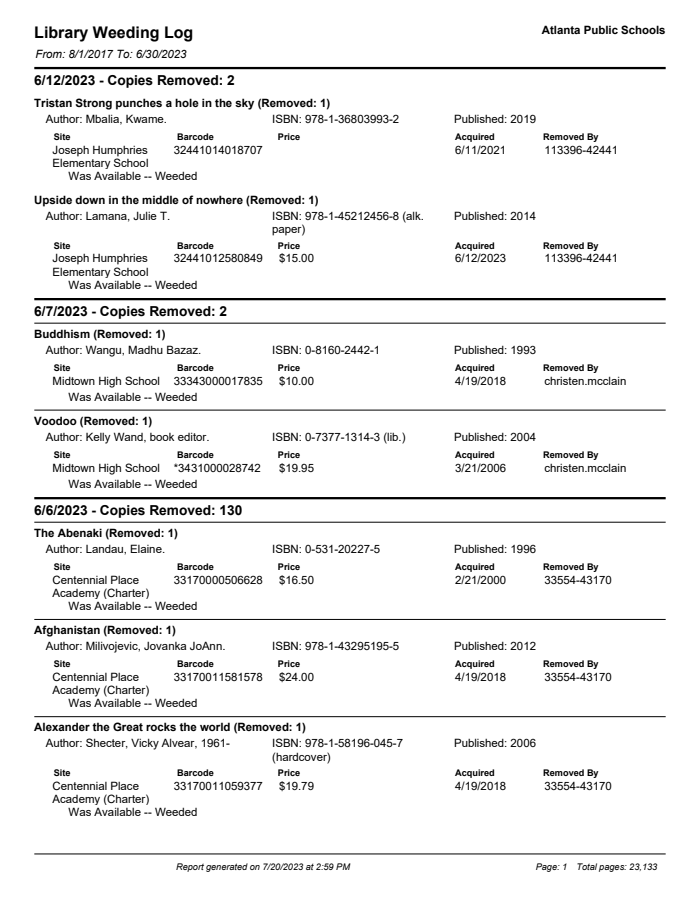

In [7]:
from natural_pdf import PDF

# Load the PDF
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/Atlanta_Public_Schools_GA_sample.pdf")

# Select the first page
page = pdf.pages[0]
page.show(width=700)

Look!

In [8]:
page.find_all('text')[0].fontname

'AAAAAB+font000000002a8d158a'

The part before the `+` is the variant – bold, italic, etc – while the part after it is the "real" font name.